In [1]:
%pylab inline
import pickle
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.utils import shuffle

Populating the interactive namespace from numpy and matplotlib


In [2]:
mnist = fetch_mldata('MNIST original', data_home=".")

In [3]:
mnist["data"].shape

(70000, 784)

In [4]:
size = 50
N = size * size
data, target = shuffle(mnist["data"], mnist["target"], random_state=777, n_samples=N)

In [5]:
data_100 = PCA(n_components=100).fit_transform(data.astype(float32) / 255)
embeddings = TSNE(init="pca", random_state=777, verbose=2).fit_transform(data_100)
embeddings -= embeddings.min(axis=0)
embeddings /= embeddings.max(axis=0)

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 2500
[t-SNE] Computed conditional probabilities for sample 2000 / 2500
[t-SNE] Computed conditional probabilities for sample 2500 / 2500
[t-SNE] Mean sigma: 2.333817
[t-SNE] Iteration 25: error = 1.6847399, gradient norm = 0.0033377
[t-SNE] Iteration 50: error = 1.6226927, gradient norm = 0.0031124
[t-SNE] Iteration 75: error = 1.3815240, gradient norm = 0.0016605
[t-SNE] Iteration 100: error = 1.3267931, gradient norm = 0.0014670
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.326793
[t-SNE] Iteration 125: error = 1.2388017, gradient norm = 0.0010967
[t-SNE] Iteration 150: error = 1.2127159, gradient norm = 0.0009978
[t-SNE] Iteration 150: gradient norm 0.000998. Finished.
[t-SNE] Error after 150 iterations: 1.326793


([], <a list of 0 Text yticklabel objects>)

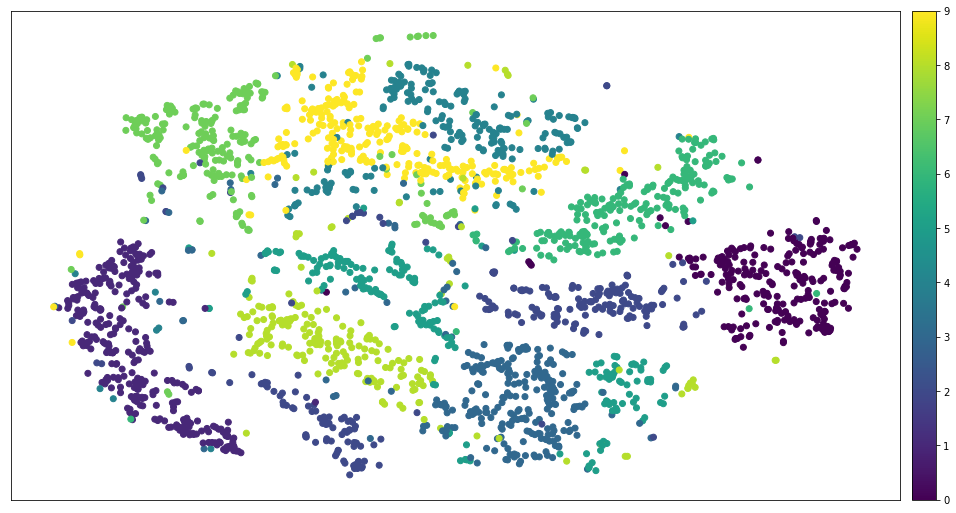

In [6]:
rcParams["figure.figsize"] = (17, 9)
scatter(embeddings[:, 0], embeddings[:, 1], c=target)
my_colorbar = colorbar(fraction=0.05, pad = 0.0125)
xticks([]); yticks([])

([], <a list of 0 Text yticklabel objects>)

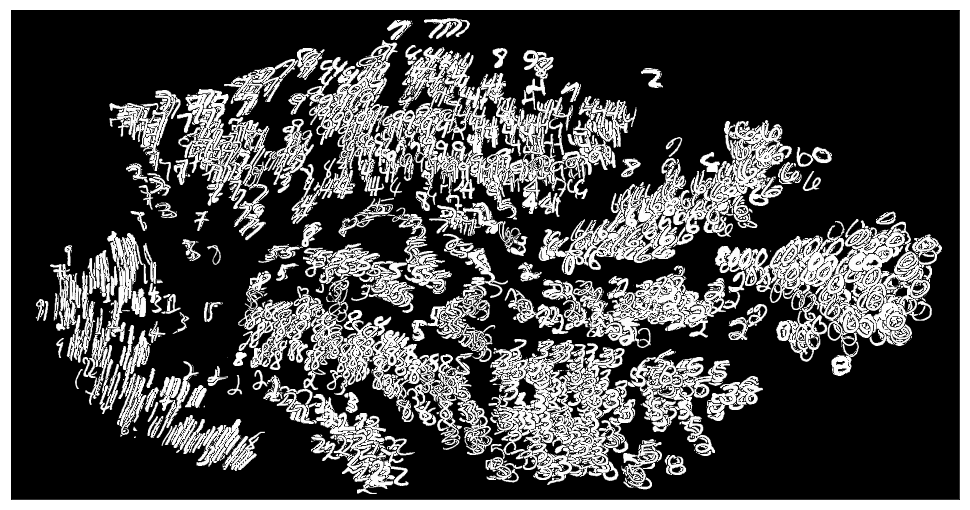

In [7]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

gca().set_facecolor("black")
rcParams["figure.figsize"] = (16, 9)
for pos, img in zip(embeddings, data):
    img = img.reshape(28, 28)
    img = stack((img, img, img, ones((28, 28), dtype=uint8) * 255), axis=-1)
    img[img[:, :, 0] == 0] = 0
    ab = AnnotationBbox(OffsetImage(img), 0.03 + pos * 0.94, xycoords="axes fraction", frameon=False)
    gca().add_artist(ab)
xticks([]); yticks([])

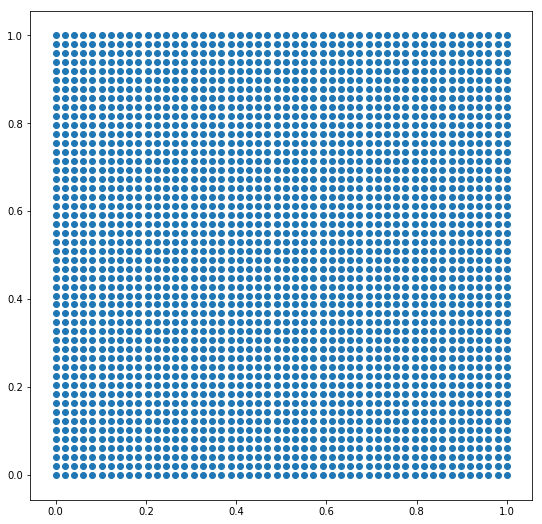

In [8]:
from scipy.spatial.distance import cdist
grid = dstack(meshgrid(linspace(0, 1, size), linspace(0, 1, size))).reshape(-1, 2)
rcParams["figure.figsize"] = (9, 9)
scatter(grid[:,0], grid[:,1])